# Visulization of the training and inference results

In [2]:
import pickle
from pathlib import Path
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from param import *

os.chdir("/work")
output_dir = ParamDir().output_dir
datalist = ParamDir().data_path_list

ValueError: x and y must have same first dimension, but have shapes (5,) and (10,)

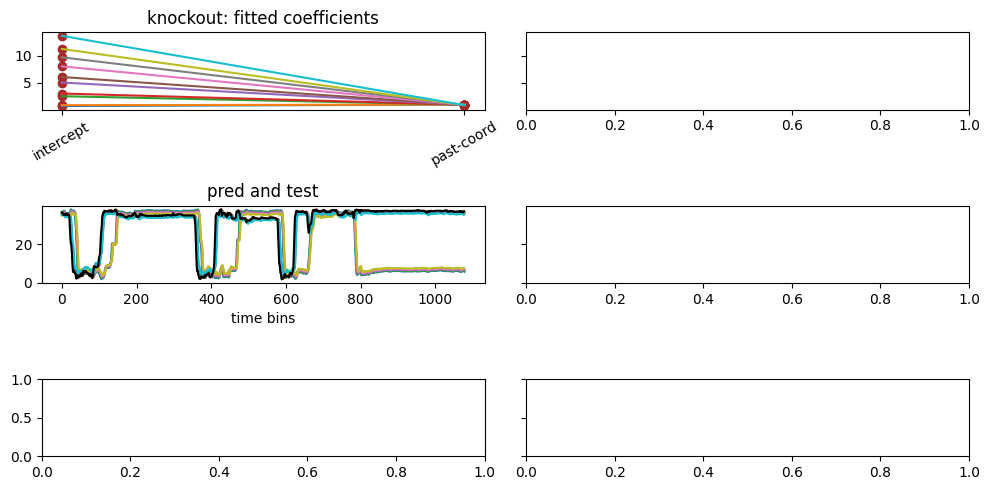

In [6]:
conf_level = .1
coord_axis = "x-axis"
fig, axes = plt.subplots(nrows = 3,ncols = 2, sharey='row', figsize = (10,5), tight_layout = True)
for m_id, data_dir in enumerate(datalist[[0,2]]):
    data_name = str(data_dir).split('/')[-1]
    mouse_type = "knockout" if "CaMKII" in data_name else "wild-type"
    with open(output_dir/(f"rr_only_past_coord_eval_{data_name}.pickle"),"rb") as f:
        eval_results_all = pickle.load(f)
    
    mse_list = []
    for result in eval_results_all:
        nthist = result["nthist"]
        # fitted parameters with p_value<.1
        axes[0][m_id].plot(result["fitted_param"], label = f"nthist:{nthist}")

        labels = axes[0][m_id].get_xticks().tolist()
        xx = np.arange(len(result["fitted_param"]))
        for ii, p_value in enumerate(result['coeff_p_values']):
            if (p_value < conf_level) or (p_value > 1 - conf_level):
                axes[0][m_id].scatter(xx[ii], result["fitted_param"][ii], c="brown")
        labels = [''] * len(result["fitted_param"])
        labels[0], labels[-1] = "intercept", "past-coord"
        axes[0][m_id].set_xticks(xx, labels, rotation=30)
        axes[0][m_id].set_title(f"{mouse_type}: fitted coefficients")

        # coordinate
        # axes[1][m_id].plot(range(len(y_test)), y_test/5, c = "black", label="test")
        axes[1][m_id].plot(range(len(result["y_test"])), result["y_pred"]/5, label = f"pred, nthist:{nthist}")

        axes[1][m_id].set_title(f"pred and test")
        axes[1][m_id].set_xlabel("time bins")

        # mse
        mse_list.append(result["eval_test_scores"])

    axes[1][m_id].plot(range(len(result["y_test"])), result["y_test"]/5, c = "black", label="test")

    # mse plot
    axes[2][m_id].plot(ParamData().nthist_range, mse_list, c = "black", label = "")
    axes[2][m_id].set_title("MSE with nthist (cm2)")
    axes[2][m_id].set_xlabel("num of history time bins")


axes[1][0].set_ylabel(f"{coord_axis} coordinates(cm)")

# legend
axes[1][1].legend(bbox_to_anchor=(1.1, 1.05), title = "coord")

legend_elements = [Line2D([0], [0], marker='o', c="brown", label=f"p value < {conf_level}")]
axes[0][0].legend(handles=legend_elements)
axes[0][1].legend(bbox_to_anchor=(1.5, 1.05), title = "fitted param")

In [5]:
result.keys()

dict_keys(['eval_test_scores', 'y_pred', 'y_test'])